# Project 6 week 2 Loan prediction project

In [1]:
#importing necessry libraries -
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# downloading the csv file
df = pd.read_csv('Documents/loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#getting the first 5 rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# checking the shape of dataset to know no of rows and columns
df.shape

(614, 13)

In [6]:
# getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#checking the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

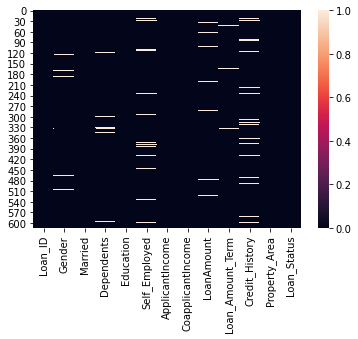

In [8]:
#checking the relationship of null values
sns.heatmap(df.isnull())
plt.show()

In [9]:
# Heatmap clearly stating the presence of NAN values .


In [10]:
# now we will describe the data set to know about null values and outliers
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
# now the description is clearly showing the presence of null values as there is a differnce in count values
# min and max values are highly mismatched which is showing there is presence of outliers too.
# standard deviation is also varies.

# Now we will check the relationships of variables to analyse dataset known as EDA-

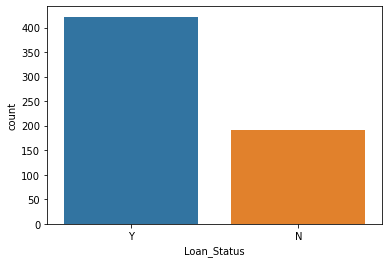

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
sns.countplot(x='Loan_Status',data=df)
plt.show()
df['Loan_Status'].value_counts()

In [13]:
# now the graphical presentation represents that 422 no is the approval of loan application and 192 didnt get the approval. so now we have to separte the categorial and non categorical data.

In [14]:
cate=['Gender', 'Married','Education','Self_Employed','Property_Area','Dependents','Credit_History']
Num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

Male      489
Female    112
Name: Gender, dtype: int64


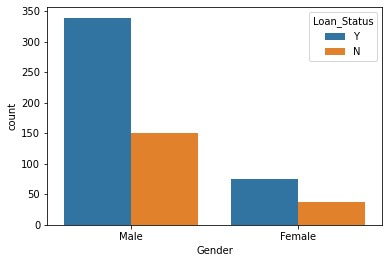

Yes    398
No     213
Name: Married, dtype: int64


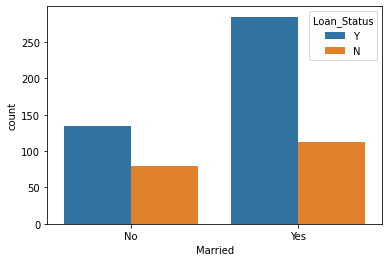

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


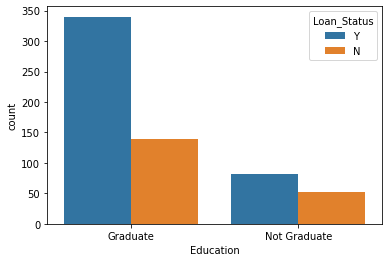

No     500
Yes     82
Name: Self_Employed, dtype: int64


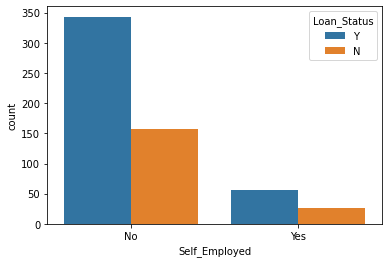

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


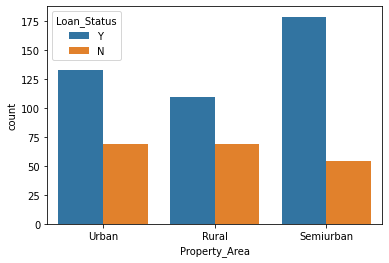

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


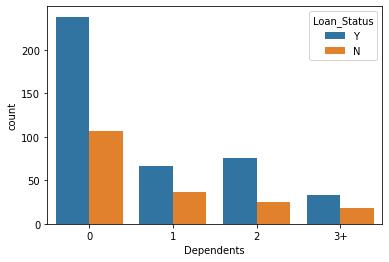

1.0    475
0.0     89
Name: Credit_History, dtype: int64


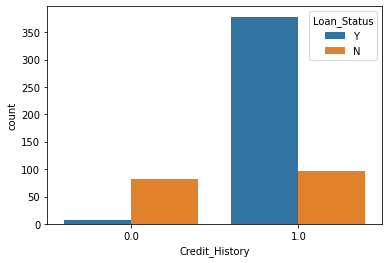

In [15]:
# now we after separtion we will check whether the male or female have higher value of approval percentage-
for m in cate:
    sns.countplot(x=m,hue='Loan_Status',data=df)
    print(df[m].value_counts())
    plt.show()

In [16]:
# now we got to know that male has higher percentage of approval of loan that may be because their educational status or married level

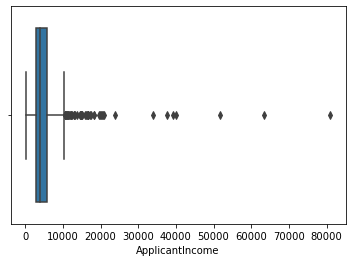

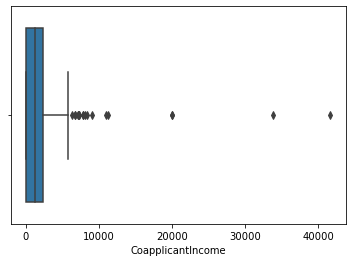

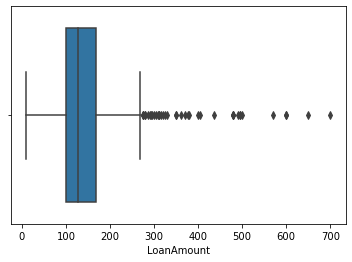

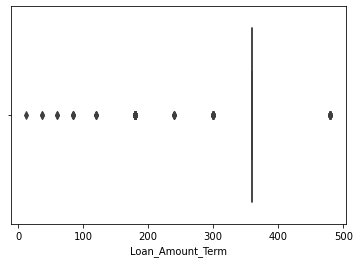

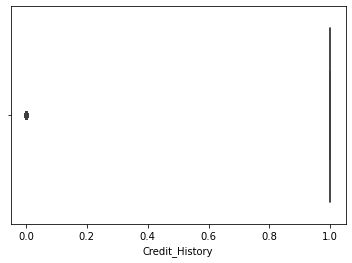

In [17]:
# now we will check the outliers
for i in df.describe().columns:
    sns.boxplot(df[i].dropna())
    plt.show()

In [18]:
# hence we have seen that there is skewness and outliers in the dataset

In [19]:
# to find the missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
#now we will impute the missing values to make the dataset compatible
from sklearn.impute import SimpleImputer

In [21]:
imp=SimpleImputer(missing_values=np.nan, strategy='mean')

In [22]:
df['LoanAmount']=imp.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term']=imp.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))

In [23]:
impl=SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [24]:
df['Credit_History']=impl.fit_transform(df['Credit_History'].values.reshape(-1,1))
df['Dependents']=impl.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Self_Employed']=impl.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Married']=impl.fit_transform(df['Married'].values.reshape(-1,1))
df['Gender']=impl.fit_transform(df['Gender'].values.reshape(-1,1))

In [25]:
# Afterimputing the values in all the desired columns we will check the missing values through isnull-

In [26]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
# now we have filled all the missing values now we have to treat skewness-

In [28]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
dtype: float64

In [29]:
# now we will use encoder to deal the skewness-

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()

In [32]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y


In [33]:
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [34]:
# now we will replace 3+ with 3 in all the dependents-

In [35]:
df['Dependents']=df['Dependents'].replace('3+',3)

In [36]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [37]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [38]:
# now we will check the non important columns thus found that loan_id is something unique and only a sequence so we can leave that

In [39]:
df.drop('Loan_ID',inplace=True,axis=1)

In [40]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [41]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [42]:
print(x.shape)
print(y.shape)

(614, 11)
(614,)


In [43]:
# as with the shape values we found the minimum amd maximum values have huge difference hence we need to scale the data

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc=StandardScaler()

In [46]:
x=sc.fit_transform(x)

In [47]:
# now we will train our model through train and test split-

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
lr=LogisticRegression()
dr=DecisionTreeClassifier()
svc=SVC()
rf=RandomForestClassifier()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [50]:
model=[lr,dr,svc,rf]

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)

In [52]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression() is:
0.7891891891891892
[[ 27  35]
 [  4 119]]
              precision    recall  f1-score   support

           0       0.87      0.44      0.58        62
           1       0.77      0.97      0.86       123

    accuracy                           0.79       185
   macro avg       0.82      0.70      0.72       185
weighted avg       0.81      0.79      0.77       185



accuracy score of DecisionTreeClassifier() is:
0.7135135135135136
[[34 28]
 [25 98]]
              precision    recall  f1-score   support

           0       0.58      0.55      0.56        62
           1       0.78      0.80      0.79       123

    accuracy                           0.71       185
   macro avg       0.68      0.67      0.67       185
weighted avg       0.71      0.71      0.71       185



accuracy score of SVC() is:
0.7783783783783784
[[ 26  36]
 [  5 118]]
              precision    recall  f1-score   support

           0       0.84      0.42      0.56    

In [53]:
# SVC accuracy = (78%)
#Random Forest classifier accuracy =76%, 
#Logistic Regression accuracy = 78% 
#Decision tree classifier accuracy = 68%.

In [54]:
# as f1 score is not so good we will perform Cross Validation and hyper parametertuning to get to know the better accuracy-

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
Lrs=cross_val_score(lr,x,y,cv=5)
print('cross validation of LogisticRegression:',Lrs.mean())

cross validation of LogisticRegression: 0.8045715047314408


In [57]:
drs=cross_val_score(dr,x,y,cv=5)
print('cross validation of DecisionTreeClassiffier:',drs.mean())

cross validation of DecisionTreeClassiffier: 0.7052512328401972


In [58]:
svr=cross_val_score(svc,x,y,cv=5)
print('cross validation of SVM:',svr.mean())

cross validation of SVM: 0.8029454884712781


In [59]:
rfr=cross_val_score(rf,x,y,cv=5)
print('cross valdation of RandomForestClassifier:',rfr.mean())

cross valdation of RandomForestClassifier: 0.776862588298014


In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
grid_param={'criterion':['gini','entropy']}
gd=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd.fit(x,y)
best_parameter=gd.best_params_
print('best_parameter:',best_parameter)

best_parameter: {'criterion': 'gini'}


In [62]:
gd_pred=gd.best_estimator_.predict(x_test)

In [63]:
accuracy_score(y_test,gd_pred)

1.0

In [64]:
print(confusion_matrix(y_test,gd_pred))
print(classification_report(y_test,gd_pred))

[[ 62   0]
 [  0 123]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       123

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185



In [65]:
#Now we have got 100% accuracy in f1 score through hyperparameter tuning. so we have found our best model.


In [66]:
# Saving the model

In [67]:
import joblib

In [68]:
joblib.dump(gd.best_estimator_,'Loan.pred')

['Loan.pred']